In [1]:
import pandas as pd
import seaborn as sns
import wandb
import matplotlib.pyplot as plt
from pandas.io.json._normalize import nested_to_record

%matplotlib inline

In [2]:
username = "lavender"
project_name = "legacy_readmission-fixed-label-new"

In [3]:
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs(f"{username}/{project_name}")
summary_list = []
config_list = []
name_list = []
for run in runs:
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # run.config is the input metrics.
    # We remove special values that start with _.
    conf = nested_to_record(run.config, sep="/")
    config = {k: v for k, v in conf.items() if not k.startswith("_")}
    config_list.append(config)

    # run.name is the name of the run.
    name_list.append(run.name)

import pandas as pd

summary_df = pd.DataFrame.from_records(summary_list)
config_df = pd.DataFrame.from_records(config_list)
name_df = pd.DataFrame({"name": name_list})
data_df = pd.concat([name_df, config_df, summary_df], axis=1)

data_df.to_csv("raw_data/3b_lace_xgb.csv")

In [4]:
legacy_df = data_df[["n_samples", "temporal test auc", "same-time test auc"]]
legacy_df["model"] = "lace-xgb"
legacy_df

/tmp/ipykernel_212922/3507927220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legacy_df["model"] = "lace-xgb"


,n_samples,temporal test auc,same-time test auc,model
0,362259,0.745123,0.757390,lace-xgb
1,100000,0.744437,0.756404,lace-xgb
2,10000,0.739542,0.752365,lace-xgb
3,362259,0.745357,0.757714,lace-xgb
4,100000,0.744637,0.756547,lace-xgb
5,10000,0.736479,0.749720,lace-xgb
6,362259,0.744976,0.757444,lace-xgb
7,100000,0.744595,0.755787,lace-xgb
8,10000,0.740529,0.750567,lace-xgb
9,362259,0.745218,0.757872,lace-xgb


In [11]:
our_df = pd.read_csv(
    "raw_data/3b_lms.csv",
    index_col=False,
    usecols=[
        "test/temporal_roc_auc",
        "test/roc_auc",
        "pretrained",
        "data/num_train_samples",
    ],
)

In [6]:
our_df = our_df.rename(
    columns={
        "test/temporal_roc_auc": "temporal test auc",
        "test/roc_auc": "same-time test auc",
        "pretrained": "model",
        "data/num_train_samples": "n_samples",
    }
)
our_df = our_df[our_df.model == "nyutron (ours)"]
our_df.model = "ours"

In [7]:
our_df

,model,n_samples,temporal test auc,same-time test auc
104,ours,100,0.678432,0.691714
105,ours,362259,0.802037,0.841336
106,ours,362259,0.797849,0.839215
107,ours,362259,0.798681,0.840226
108,ours,362259,0.799166,0.838727
109,ours,100000,0.794904,0.835841
110,ours,100000,0.787162,0.831981
111,ours,100000,0.795120,0.834362
112,ours,100000,0.788712,0.833380
113,ours,10000,0.746780,0.815774


In [8]:
plot_df = pd.concat([legacy_df, our_df])
plot_df

,n_samples,temporal test auc,same-time test auc,model
0,362259,0.745123,0.757390,lace-xgb
1,100000,0.744437,0.756404,lace-xgb
2,10000,0.739542,0.752365,lace-xgb
3,362259,0.745357,0.757714,lace-xgb
4,100000,0.744637,0.756547,lace-xgb
5,10000,0.736479,0.749720,lace-xgb
6,362259,0.744976,0.757444,lace-xgb
7,100000,0.744595,0.755787,lace-xgb
8,10000,0.740529,0.750567,lace-xgb
9,362259,0.745218,0.757872,lace-xgb


In [9]:
palette = sns.color_palette("Set2", 10)
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

/tmp/ipykernel_212922/1021173838.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=plot_df,x='n_samples',y='temporal test auc', hue='model',


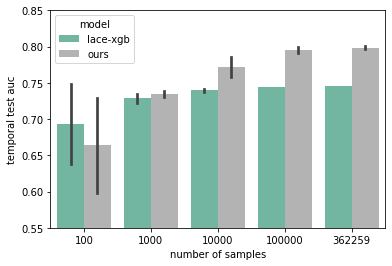

In [10]:
import numpy as np

sns.barplot(
    data=plot_df,
    x="n_samples",
    y="temporal test auc",
    hue="model",
    palette=[palette[0], palette[7]],
    estimator=np.median,
    ci="sd",
)
plt.ylim([0.55, 0.85])
plt.xlabel("number of samples")
plt.savefig("plots/legacy_vs_ours.png")